<img src="https://www.usna.edu/WRC/_files/WRClogos/WRCE-logo-combined-01-crop.png" width="200px">

# Alien Invasion (Chapter 12)

Create a seperate file in your alien invasion game for each of the following questions. Paste the content of the file into a Jupyter Notebook cell along with a screen shot of the game (2 cells per answer)

**12-1. Blue Sky:** Make a Pygame window with a blue background

In [1]:
import pygame
import sys

pygame.init()

screen_width = 1000
screen_height = 600
bg_color = (0, 0, 230)

screen = pygame.display.set_mode((screen_width, screen_height))
screen.fill(bg_color)
pygame.display.set_caption("blue sky")

while True:
    pygame.display.flip()
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            sys.exit()

NameError: name 'Actor' is not defined

screen shot

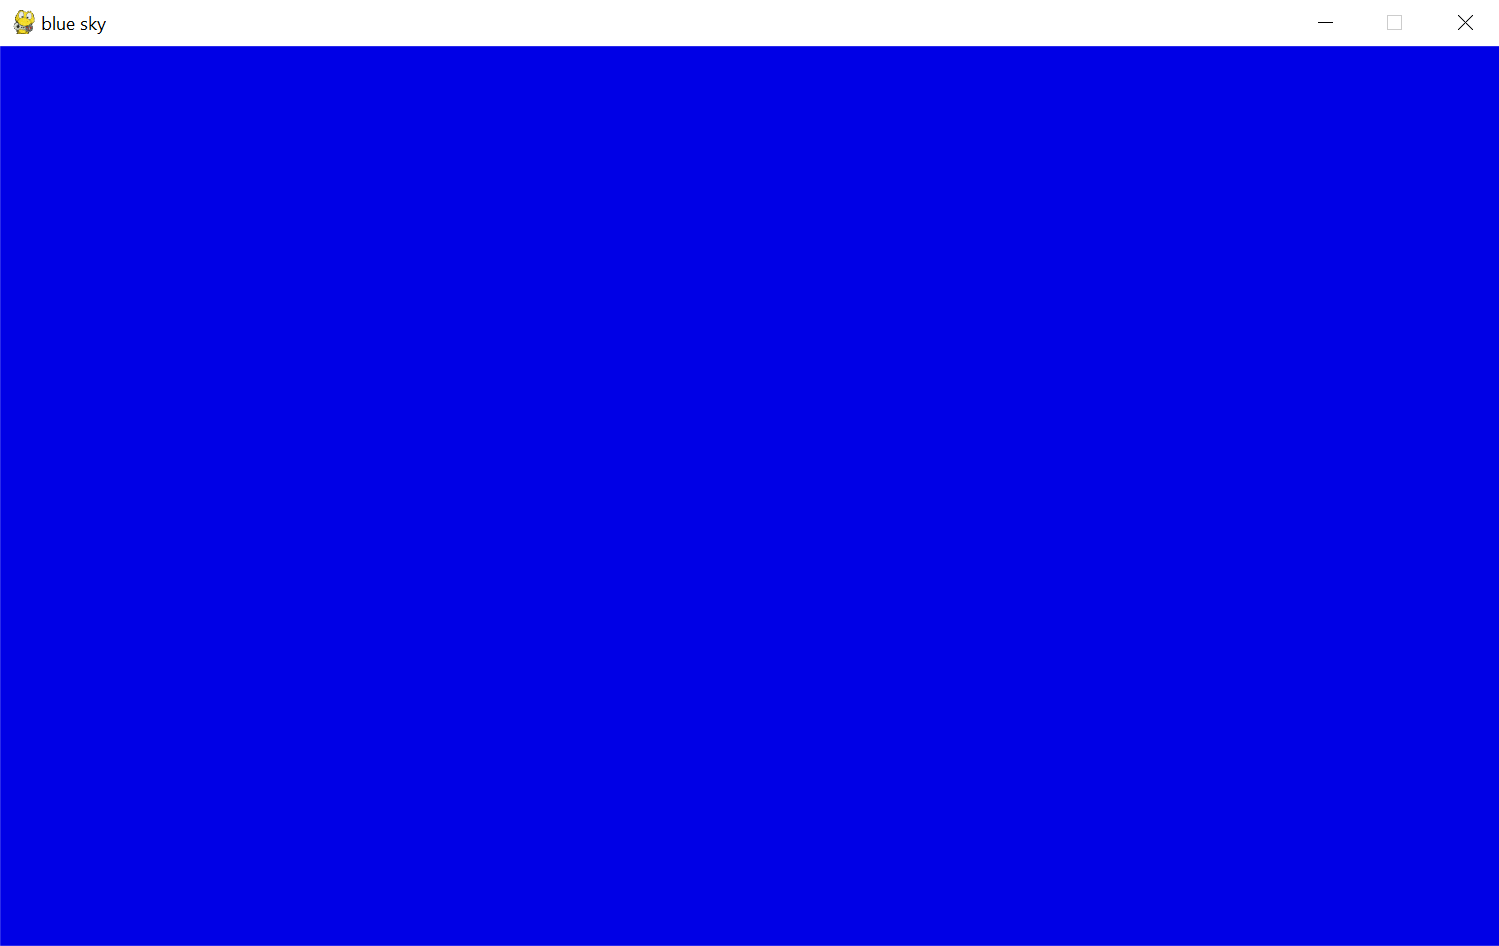

**12-2. Game Character:** Find a bitmap image of a game character you like or convert an image to a bitmap. Make a class that draws the character at the center of the screen and match the background color of the image to the background color of the screen or vice versa

In [2]:
import pygame

class Ghost:

    def __init__(self, ai_game):
        #initialize ghost and starting position
        self.screen = ai_game.screen
        self.screen_rect = ai_game.screen.get_rect()

        #load ghost image and get its rectangular parameters as if it were a rectangle
        self.image = pygame.image.load('images/ghost.png')
        self.rect = self.image.get_rect()

        #start each new ghost at bottom center
        self.rect.center = self.screen_rect.center

    def blitme(self):
        #draw ghost at current location
        self.screen.blit(self.image, self.rect)

screen shot
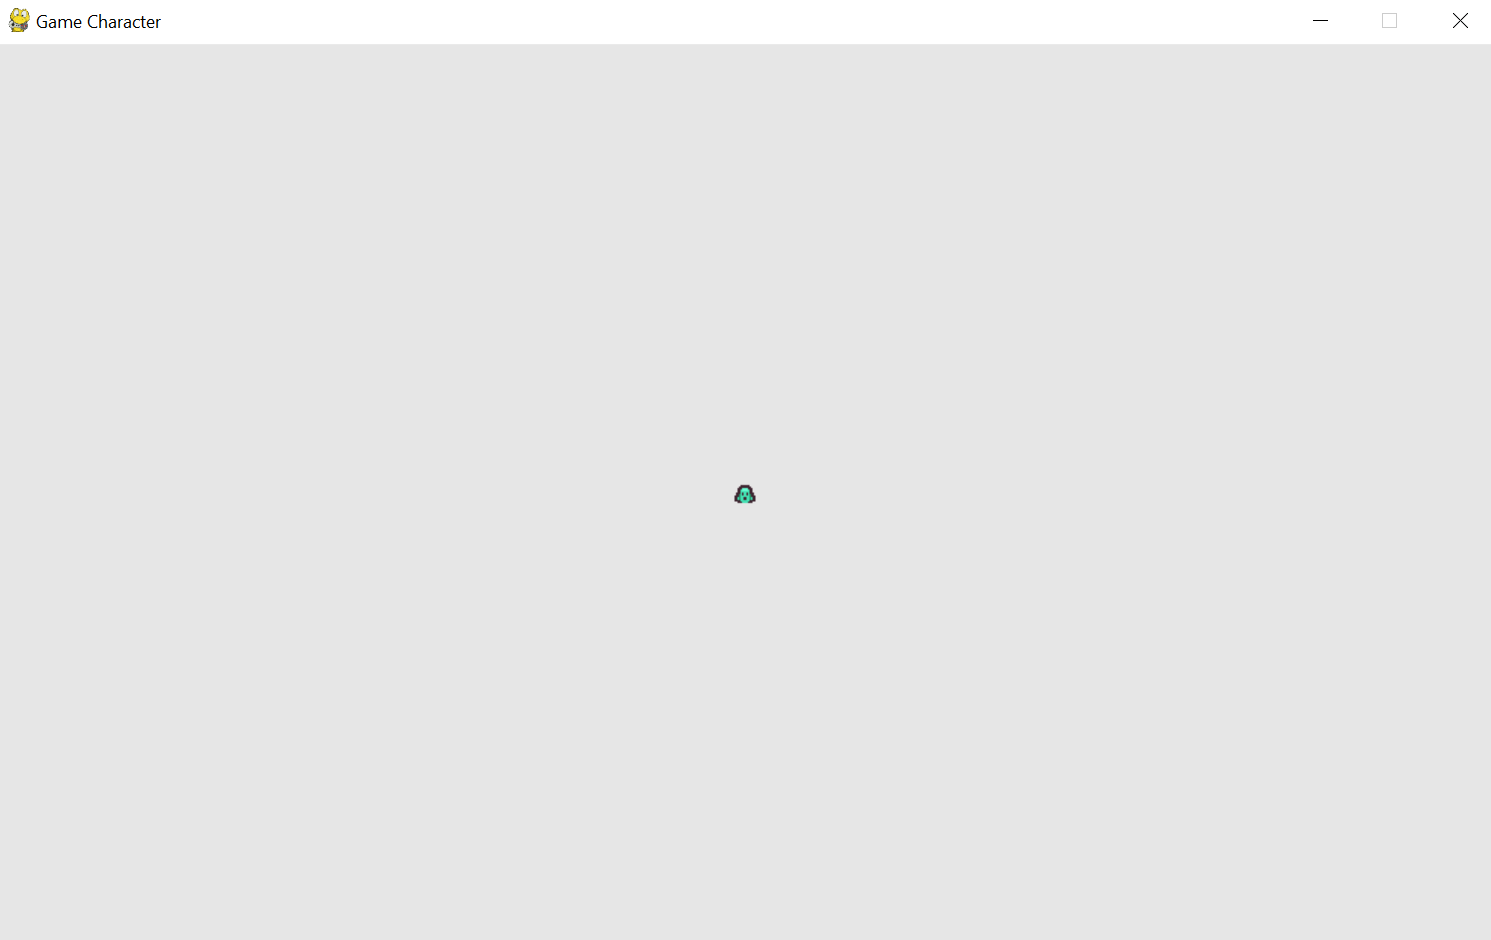

**12-4. Rocket:** Make a game that begins with a rocket in the center of the screen. Allow the player to move the rocket up, down, left, or right using the four arrow keys. Make sure the rocket never moves beyond any edge of the screen.

In [2]:
import pygame

class Rocket:

    def __init__(self, ai_game):
        #initialize image and starting position
        self.screen = ai_game.screen
        self.screen_rect = ai_game.screen.get_rect()
        self.settings = ai_game.settings

        #load image and get its rectangular parameters as if it were a rectangle
        self.image = pygame.image.load('images/rocket.png')
        self.rect = self.image.get_rect()

        #start each new image at bottom center
        self.rect.center = self.screen_rect.center

        #store decimal value for image's horizontal position
        self.x = float(self.rect.x)
        self.y = float(self.rect.y)

        #movement flag
        self.moving_right = False
        self.moving_left = False
        self.moving_up = False
        self.moving_down = False

    def update(self):
        #update image's position based on movement flag
        #update image's x and y values
        if self.moving_right and self.rect.right < self.screen_rect.right:
            self.x += self.settings.rocket_speed
        if self.moving_left and self.rect.left > 0:
            self.x -= self.settings.rocket_speed
        if self.moving_up and self.rect.top > 0:
            self.y -= self.settings.rocket_speed
        if self.moving_down and self.rect.bottom < self.screen_rect.bottom:
            self.y += self.settings.rocket_speed

        #update rect object from self.x
        self.rect.x = self.x
        self.rect.y = self.y
    def blitme(self):
        #draw image at current location
        self.screen.blit(self.image, self.rect)

screen shot
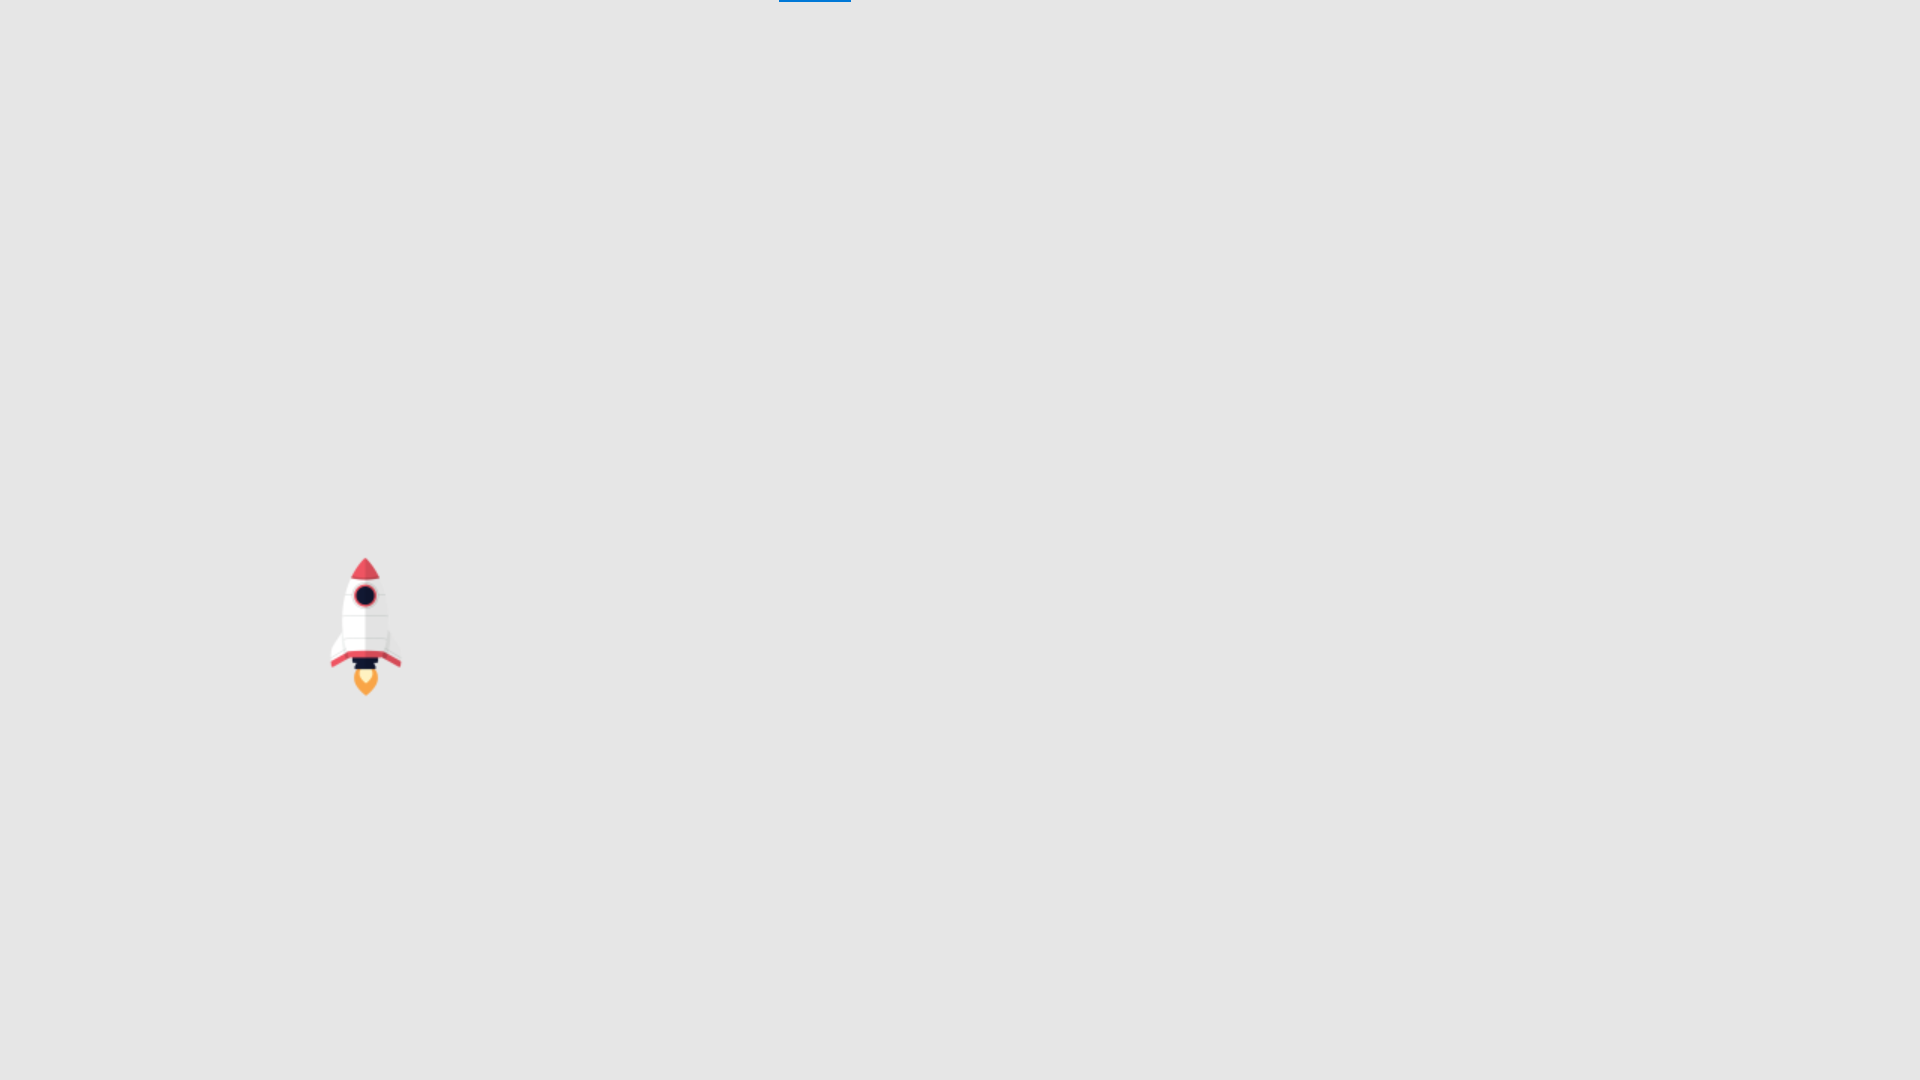

**12-5. Keys:** Make a Pygame file that creates an empty screen. In the event loop, print the `event.key` attribute whenever a `pygame.KEYDOWN` event is detected. Run the program and press various keys to see how Pygame responds. Your screen shot should be the text output from the Pycharm consolse (not the game screen)

In [2]:
# code
import sys
import pygame

from settings import Settings

class keys:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("keys")

    def run_game(self):
        while True:
            self._check_events()
            self._update_screen()

    def _check_events(self):
        #respond to key and mouse presses
        #accesses keydown and keyup methods as its helper methods so this method is cleaner
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                self._check_keydown_events(event)

    def _check_keydown_events(self, event):
        if event.key == pygame.K_q:
            sys.exit()
        print(event.key)

    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = keys()
    ai.run_game()


screen shot
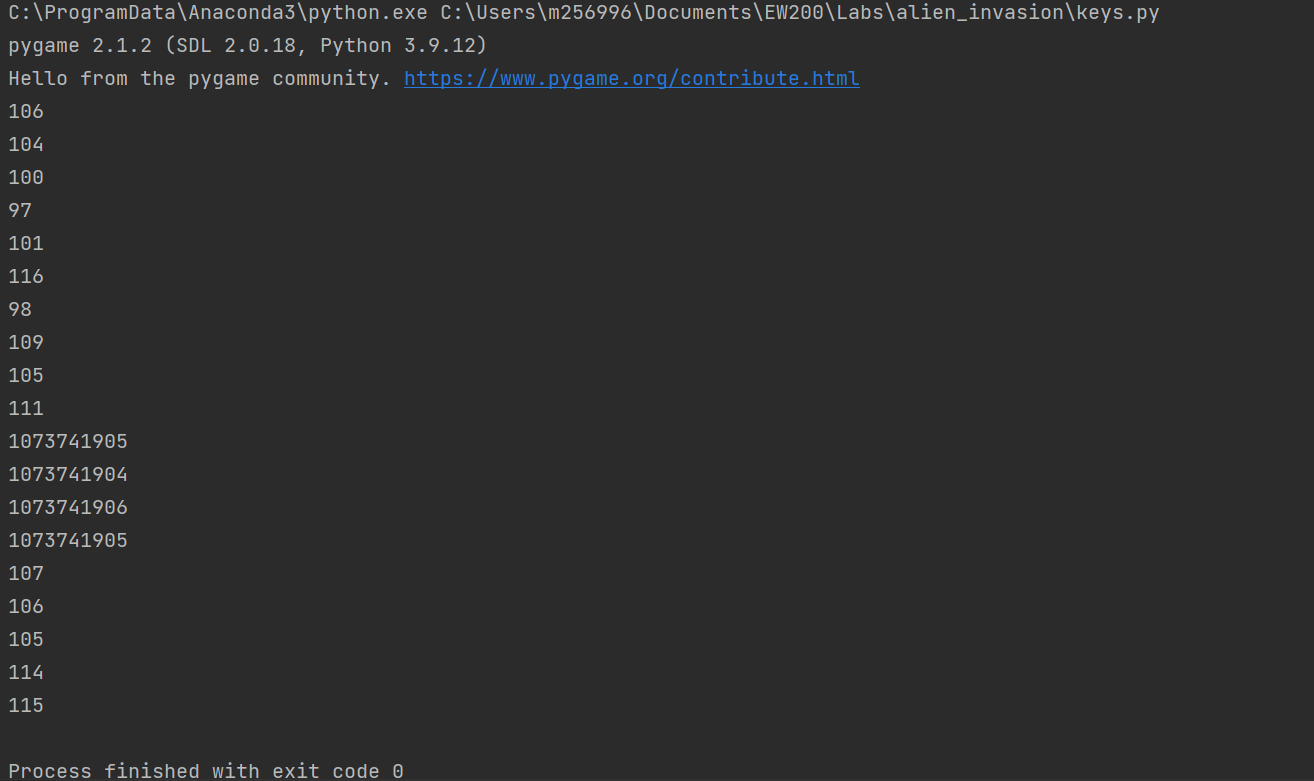

**12-6. Sideways Shooter:** Write a game that places a ship on the left side of the screen and allows the player to move the ship up and down. Make the ship fire a bullet that travels right across the screen when the player presses the spacebar. Make sure the bullets are deleted once they disappear off the screen

In [2]:
# code
import sys
import pygame

from settings import Settings
from sship import sShip
from sbullet import sBullet

class SShooter:

    def __init__(self):
        pygame.init()
        self.settings = Settings()
        self.screen = pygame.display.set_mode((0,0), pygame.FULLSCREEN)
        self.settings.screen_width = self.screen.get_rect().width
        self.settings.screen_height = self.screen.get_rect().height

        pygame.display.set_caption("Sideways Shooter")

        self.sship = sShip(self)
        #create group of bullets that will have their positions updated
        self.sbullets = pygame.sprite.Group()

    def run_game(self):
        while True:
            self._check_events()
            self.sship.update()
            self._update_bullets()
            self._update_screen()

    def _check_events(self):
        #respond to key and mouse presses
        #accesses keydown and keyup methods as its helper methods so this method is cleaner
        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN:
                self._check_keydown_events(event)
            elif event.type == pygame.KEYUP:
                self._check_keyup_events(event)

    def _check_keydown_events(self, event):
        if event.key == pygame.K_q:
            sys.exit()

        elif event.key == pygame.K_UP:
            self.sship.moving_up = True
        elif event.key == pygame.K_DOWN:
            self.sship.moving_down = True

        elif event.key == pygame.K_SPACE:
            self._fire_bullet()

    def _check_keyup_events(self, event):
        if event.key == pygame.K_UP:
            self.sship.moving_up = False
        elif event.key == pygame.K_DOWN:
            self.sship.moving_down = False

    def _fire_bullet(self):
        #create new bullet and add to bullets group
        if len(self.sbullets) < self.settings.bullets_allowed:
            new_bullet = sBullet(self)
            self.sbullets.add(new_bullet)

    def _update_bullets(self):
        #update position of bullets
        self.sbullets.update()

        # get rid of bullets that have disappeared
        for bullet in self.sbullets.copy():
            if bullet.rect.right >= self.settings.screen_width:
                self.sbullets.remove(bullet)

    def _update_screen(self):
        # redraw screen during each pass through the loop
        self.screen.fill(self.settings.bg_color)

        self.sship.blitme()

        for bullet in self.sbullets.sprites():
            bullet.draw_bullet()

        # make most recently drawn screen visible
        pygame.display.flip()

if __name__=='__main__':
    #make a game instance from class AlienInvasion and run game
    ai = SShooter()
    ai.run_game()

screen shot
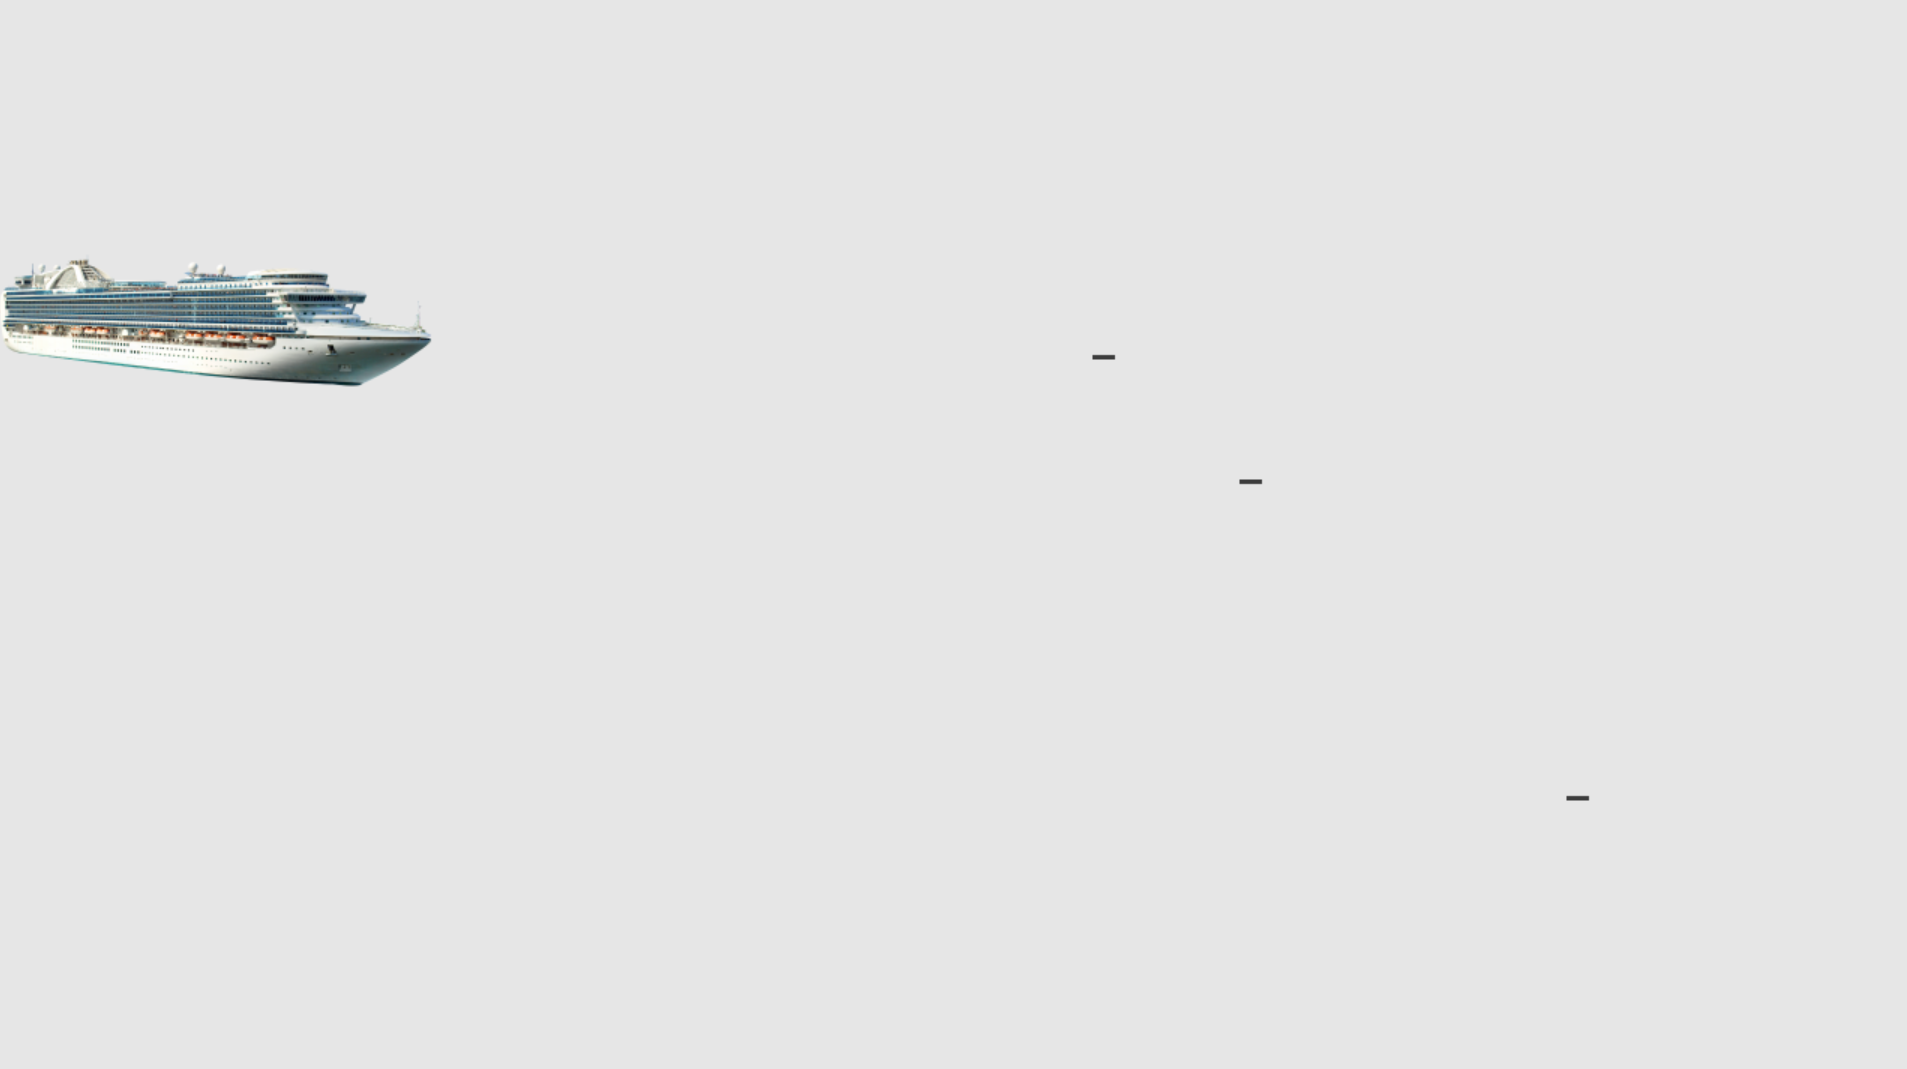